In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
leads = pd.read_csv(r"C:\Users\kunaa\Desktop\MS in Data Science\Machine Learning\Lead Scoring Assignment\Leads.csv")
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
leads.shape

(9240, 37)

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

###### Removing those nul values wih <5% treshold

In [7]:
for column in leads.columns:
    # Calculate the percentage of null values in the column
    null_percentage = leads[column].isnull().mean()*100
    
    # Check if the null percentage is less than 5%
    if null_percentage < 5:
        # Drop null values in the column if percentage is less than 5%
        leads.dropna(subset=[column], inplace=True)


In [8]:
leads.shape

(9074, 37)

In [9]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2296
Specialization                                   1431
How did you hear about X Education               2200
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
leads['Country'].isnull().value_counts(normalize=True)

False    0.746969
True     0.253031
Name: Country, dtype: float64

In [11]:
leads['Country'].value_counts(normalize=True)

India                   0.957657
United States           0.010180
United Arab Emirates    0.007819
Singapore               0.003541
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [12]:
leads['Country'].fillna(leads['Country'].mode()[0], inplace=True)

In [13]:
leads['Country'].isnull().value_counts(normalize=True)

False    1.0
Name: Country, dtype: float64

In [14]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1431
How did you hear about X Education               2200
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Magazine                                            0
Newspaper Article           

In [15]:
leads['Specialization'].value_counts(normalize=True)

Select                               0.242182
Finance Management                   0.125474
Human Resource Management            0.109512
Marketing Management                 0.107680
Operations Management                0.065288
Business Administration              0.052205
IT Projects Management               0.047887
Supply Chain Management              0.045270
Banking, Investment And Insurance    0.043831
Travel and Tourism                   0.026429
Media and Advertising                0.026429
International Business               0.023028
Healthcare Management                0.020411
E-COMMERCE                           0.014523
Hospitality Management               0.014523
Retail Management                    0.013084
Rural and Agribusiness               0.009551
E-Business                           0.007458
Services Excellence                  0.005234
Name: Specialization, dtype: float64

In [16]:
leads['Specialization'].isnull().value_counts(normalize=True)

False    0.842297
True     0.157703
Name: Specialization, dtype: float64

In [17]:
import random

frequent_specs = leads['Specialization'].mode().tolist()
leads['Specialization'].fillna(random.choice(frequent_specs), inplace=True)

In [18]:
leads['Specialization'].value_counts(normalize=True)

Select                               0.361693
Finance Management                   0.105687
Human Resource Management            0.092242
Marketing Management                 0.090699
Operations Management                0.054992
Business Administration              0.043972
IT Projects Management               0.040335
Supply Chain Management              0.038131
Banking, Investment And Insurance    0.036919
Travel and Tourism                   0.022261
Media and Advertising                0.022261
International Business               0.019396
Healthcare Management                0.017192
E-COMMERCE                           0.012233
Hospitality Management               0.012233
Retail Management                    0.011020
Rural and Agribusiness               0.008045
E-Business                           0.006282
Services Excellence                  0.004408
Name: Specialization, dtype: float64

In [19]:
leads['Specialization'].isnull().value_counts(normalize=True)

False    1.0
Name: Specialization, dtype: float64

In [20]:
leads['Specialization'].replace("Select","Unknown",inplace=True)
leads['Specialization'].value_counts(normalize=True)

Unknown                              0.361693
Finance Management                   0.105687
Human Resource Management            0.092242
Marketing Management                 0.090699
Operations Management                0.054992
Business Administration              0.043972
IT Projects Management               0.040335
Supply Chain Management              0.038131
Banking, Investment And Insurance    0.036919
Travel and Tourism                   0.022261
Media and Advertising                0.022261
International Business               0.019396
Healthcare Management                0.017192
E-COMMERCE                           0.012233
Hospitality Management               0.012233
Retail Management                    0.011020
Rural and Agribusiness               0.008045
E-Business                           0.006282
Services Excellence                  0.004408
Name: Specialization, dtype: float64

In [21]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
How did you hear about X Education               2200
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Magazine                                            0
Newspaper Article           

In [22]:
#removing columns with >30% null values

# Calculate the percentage of null values in each column
null_percentage = (leads.isnull().mean() * 100)

# Identify columns with null percentage greater than 30%
columns_to_drop = null_percentage[null_percentage > 30].index

# Drop the identified columns
leads.drop(columns=columns_to_drop, inplace=True)

In [23]:
leads.shape

(9074, 31)

In [24]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
How did you hear about X Education               2200
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Magazine                                            0
Newspaper Article           

In [25]:
leads['City'].value_counts(normalize=True)

Mumbai                         0.415023
Select                         0.281646
Thane & Outskirts              0.097322
Other Cities                   0.088831
Other Cities of Maharashtra    0.058263
Other Metro Cities             0.049249
Tier II Cities                 0.009667
Name: City, dtype: float64

In [26]:
leads['City'].isnull().value_counts(normalize=True)

False    0.843619
True     0.156381
Name: City, dtype: float64

In [27]:
cities = leads['City'].mode().tolist()
leads['City'].fillna(random.choice(cities), inplace=True)

In [28]:
leads['City'].value_counts(normalize=True)

Mumbai                         0.506502
Select                         0.237602
Thane & Outskirts              0.082103
Other Cities                   0.074939
Other Cities of Maharashtra    0.049151
Other Metro Cities             0.041547
Tier II Cities                 0.008155
Name: City, dtype: float64

In [29]:
leads['City'].isnull().value_counts(normalize=True)

False    1.0
Name: City, dtype: float64

In [30]:
leads['City'].replace("Select","Unknown",inplace=True)
leads['City'].value_counts(normalize=True)

Mumbai                         0.506502
Unknown                        0.237602
Thane & Outskirts              0.082103
Other Cities                   0.074939
Other Cities of Maharashtra    0.049151
Other Metro Cities             0.041547
Tier II Cities                 0.008155
Name: City, dtype: float64

In [31]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
How did you hear about X Education               2200
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Magazine                                            0
Newspaper Article           

In [32]:
leads['How did you hear about X Education'].value_counts(normalize=True)

Select                   0.710794
Online Search            0.117544
Word Of Mouth            0.050480
Student of SomeSchool    0.045097
Other                    0.027058
Multiple Sources         0.022112
Advertisements           0.010183
Social Media             0.009601
Email                    0.003782
SMS                      0.003346
Name: How did you hear about X Education, dtype: float64

In [33]:
leads['How did you hear about X Education'].isnull().value_counts(normalize=True)

False    0.757549
True     0.242451
Name: How did you hear about X Education, dtype: float64

In [34]:
sources = leads['How did you hear about X Education'].mode().tolist()
leads['How did you hear about X Education'].fillna(random.choice(sources), inplace=True)

In [35]:
leads['How did you hear about X Education'].isnull().value_counts(normalize=True)

False    1.0
Name: How did you hear about X Education, dtype: float64

In [36]:
leads['How did you hear about X Education'].value_counts(normalize=True)

Select                   0.780912
Online Search            0.089046
Word Of Mouth            0.038241
Student of SomeSchool    0.034164
Other                    0.020498
Multiple Sources         0.016751
Advertisements           0.007714
Social Media             0.007274
Email                    0.002865
SMS                      0.002535
Name: How did you hear about X Education, dtype: float64

In [37]:
leads['How did you hear about X Education'].replace("Select","Unknown",inplace=True)
leads['How did you hear about X Education'].value_counts(normalize=True)

Unknown                  0.780912
Online Search            0.089046
Word Of Mouth            0.038241
Student of SomeSchool    0.034164
Other                    0.020498
Multiple Sources         0.016751
Advertisements           0.007714
Social Media             0.007274
Email                    0.002865
SMS                      0.002535
Name: How did you hear about X Education, dtype: float64

In [38]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Magazine                                            0
Newspaper Article           

In [39]:
leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.856830
Working Professional    0.105930
Student                 0.032233
Other                   0.002347
Housewife               0.001408
Businessman             0.001252
Name: What is your current occupation, dtype: float64

In [40]:
leads['What is your current occupation'].isnull().value_counts(normalize=True)

False    0.70432
True     0.29568
Name: What is your current occupation, dtype: float64

In [41]:
occupation = leads['What is your current occupation'].mode().tolist()
leads['What is your current occupation'].fillna(random.choice(occupation), inplace=True)

In [42]:
leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.899162
Working Professional    0.074609
Student                 0.022702
Other                   0.001653
Housewife               0.000992
Businessman             0.000882
Name: What is your current occupation, dtype: float64

In [43]:
leads['What is your current occupation'].isnull().value_counts(normalize=True)

False    1.0
Name: What is your current occupation, dtype: float64

In [44]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                     0
What matters most to you in choosing a course    2702
Search                                              0
Magazine                                            0
Newspaper Article           

In [45]:
leads['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999686
Flexibility & Convenience    0.000157
Other                        0.000157
Name: What matters most to you in choosing a course, dtype: float64

In [46]:
leads['What matters most to you in choosing a course'].isnull().value_counts(normalize=True)

False    0.702226
True     0.297774
Name: What matters most to you in choosing a course, dtype: float64

In [47]:
motivation = leads['What matters most to you in choosing a course'].mode().tolist()
leads['What matters most to you in choosing a course'].fillna(random.choice(motivation), inplace=True)

In [48]:
leads['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.99978
Flexibility & Convenience    0.00011
Other                        0.00011
Name: What matters most to you in choosing a course, dtype: float64

In [49]:
leads['What matters most to you in choosing a course'].isnull().value_counts(normalize=True)

False    1.0
Name: What matters most to you in choosing a course, dtype: float64

In [50]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

In [51]:
leads['Lead Profile'].value_counts(normalize=True)

Select                         0.636378
Potential Lead                 0.243879
Other Leads                    0.075643
Student of SomeSchool          0.037665
Lateral Student                0.003296
Dual Specialization Student    0.003139
Name: Lead Profile, dtype: float64

In [52]:
leads['Lead Profile'].isnull().value_counts(normalize=True)

False    0.702226
True     0.297774
Name: Lead Profile, dtype: float64

In [53]:
lead_pro = leads['Lead Profile'].mode().tolist()
leads['Lead Profile'].fillna(random.choice(lead_pro), inplace=True)

In [54]:
leads['Lead Profile'].value_counts(normalize=True)

Select                         0.744655
Potential Lead                 0.171259
Other Leads                    0.053119
Student of SomeSchool          0.026449
Lateral Student                0.002314
Dual Specialization Student    0.002204
Name: Lead Profile, dtype: float64

In [55]:
leads['Lead Profile'].isnull().value_counts(normalize=True)

False    1.0
Name: Lead Profile, dtype: float64

In [56]:
leads.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

### EDA

In [57]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [58]:
categorical = leads.select_dtypes(include=['object']).columns

In [59]:
leads[categorical].shape

(9074, 26)

### 26 Categorical variables

#### But how many do we need?

We can remove those columns with highly skewed values. What if we have a threshold of 0.85 to drop those columns

In [60]:
Thres = 0.85

In [61]:
categorical = leads.select_dtypes(include=['object']).columns

columns_to_drop = []

# Iterate over each categorical column
for col in categorical:
    # Compute frequency distribution of categories
    category_counts = leads[col].value_counts()
    
    # Compute relative frequency of each category
    relative_freq = category_counts / len(leads)
    
    # Check if relative frequency of top category is greater than the threshold
    if relative_freq.iloc[0] > Thres:
        columns_to_drop.append(col)


new_leads = leads.drop(columns=columns_to_drop)

In [62]:
new_leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      Olark Chat          0          0.0                            0   
1  Organic Search          0          5.0                          674   
2  Direct Traffic          1          2.0                         1532   
3  Direct Traffic          0          1.0                          305   
4          Google          1          2.0                         1428   

   Page Views Per Visit            Last Activity           Specialization  \
0                   0.0  Page Visited on Website                  Unknown   
1                   2.5             Email Opened                  Unknown   
2                   2.0             Email Opened  Business Administration   
3                   1.0              Unreachable    Media and Advertising   
4                   1.0        Converted to Lead                  Unknown   

  How did you hear about X Education    Lead Profile     City  \
0                            Unknown          Select  Unknown   
1                            Unknown          Select  Unknown   
2                            Unknown  Potential Lead   Mumbai   
3                      Word Of Mouth          Select   Mumbai   
4                              Other          Select   Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [63]:
new_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  How did you hear about X Education      9074 non-null   obje

In [64]:
num_duplicates = new_leads['Prospect ID'].duplicated().sum()

print("Number of duplicates in 'prospect ID' column:", num_duplicates)

Number of duplicates in 'prospect ID' column: 0


### Prospect ID really doesn't add value to the model

In [65]:
new_leads = new_leads.drop('Prospect ID', axis=1)

In [66]:
new_leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [67]:
new_leads.select_dtypes(include=['object']).columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [68]:
converted_leads = new_leads[new_leads['Converted'] == 1]

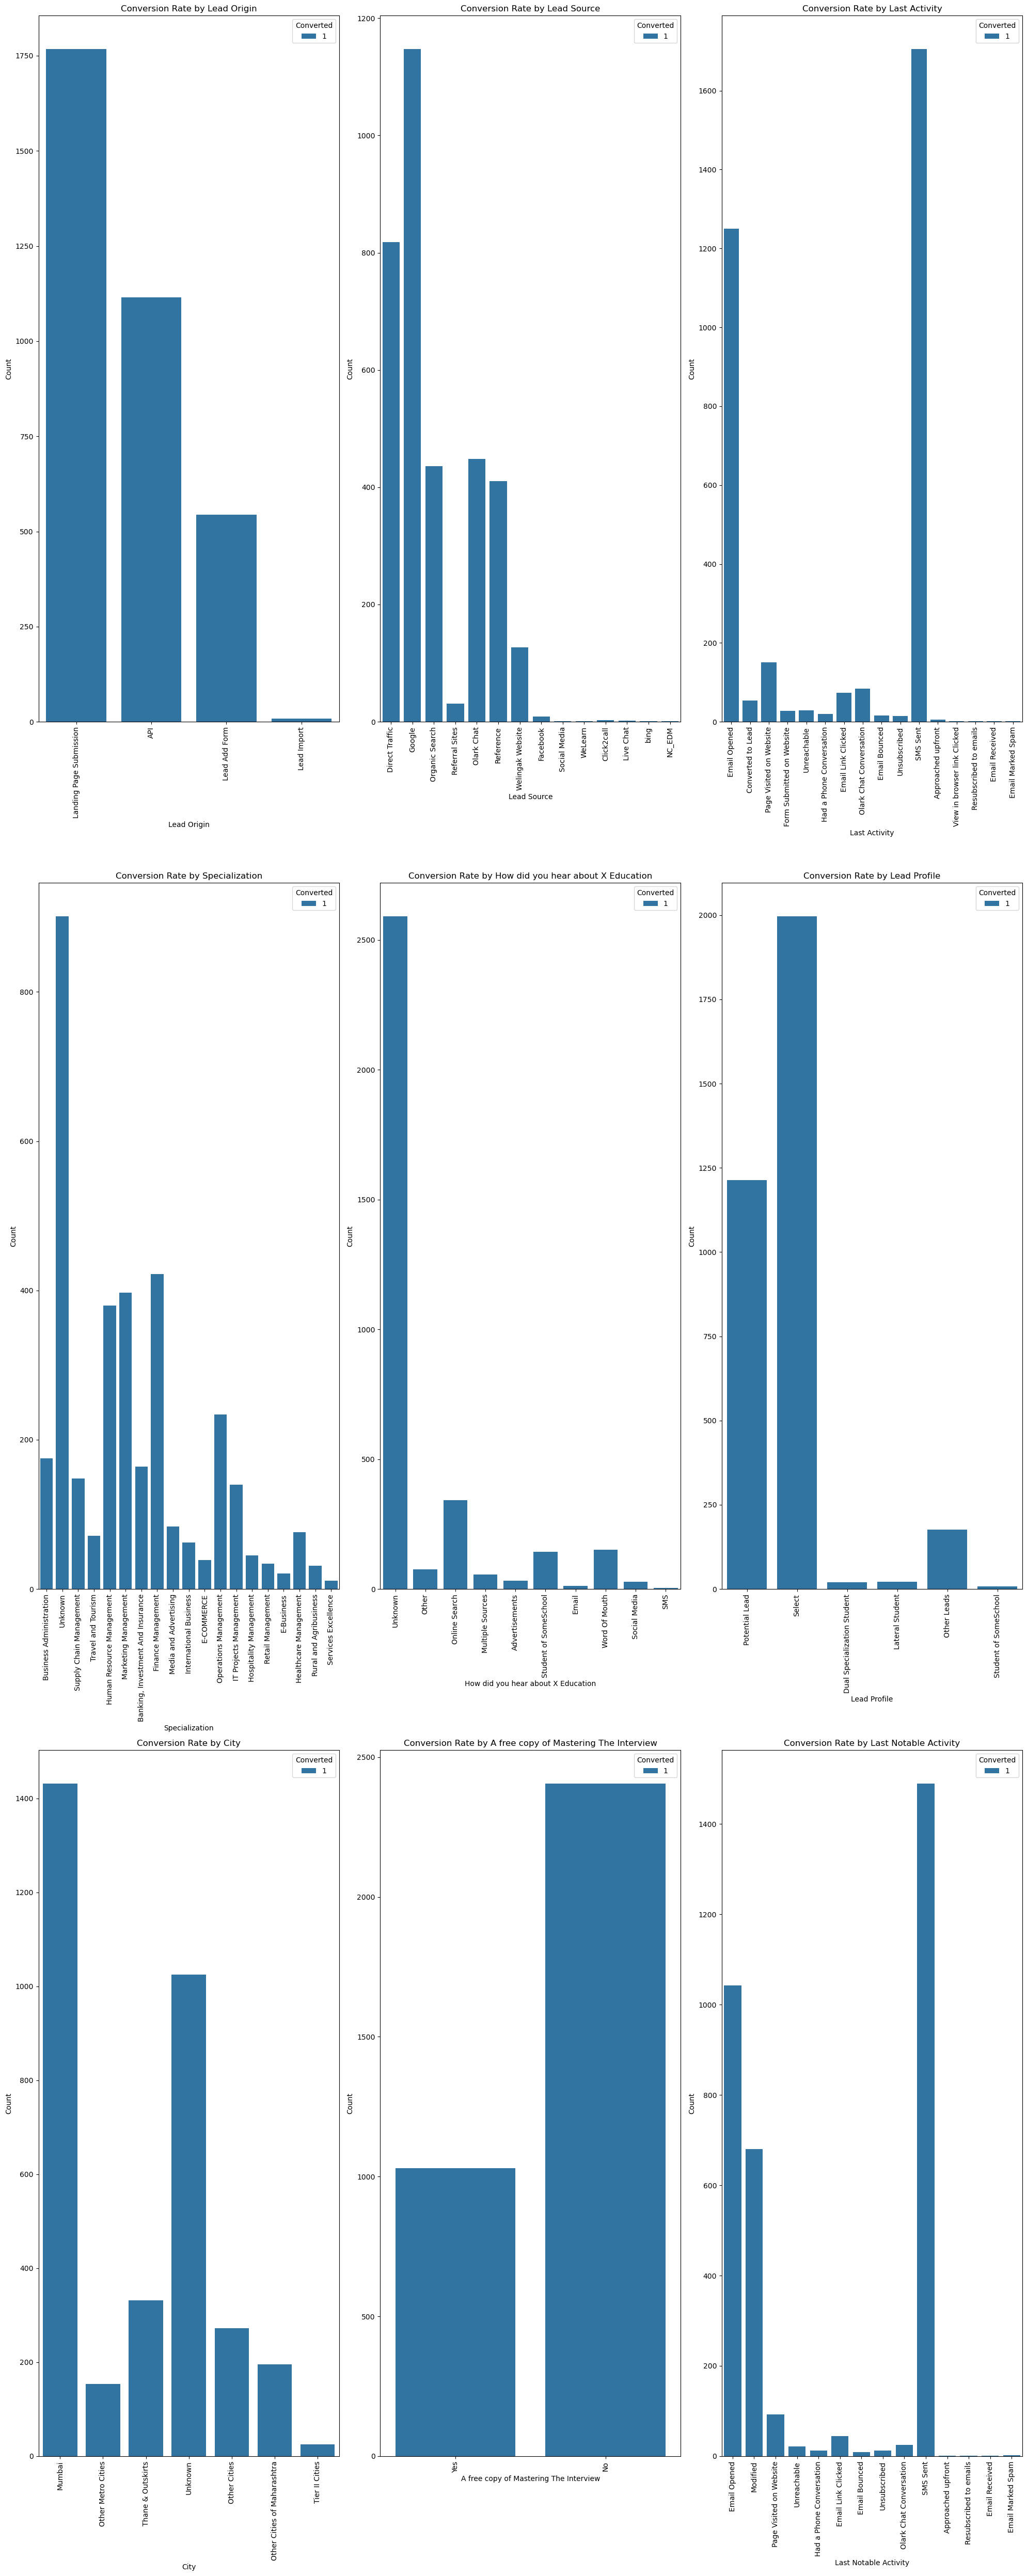

In [69]:
categorical_columns = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                      'How did you hear about X Education', 'Lead Profile', 'City',
                      'A free copy of Mastering The Interview', 'Last Notable Activity']

# Set up the figure size and subplots
plt.figure(figsize=(20, 50))
for i, col in enumerate(categorical_columns, start=1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='Converted', data=converted_leads)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Conversion Rate by {col}')
    plt.xticks(rotation=90)  

plt.tight_layout()
plt.show()


In [70]:
new_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9074 non-null   int64  
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   How did you hear about X Education      9074 non-null   object 
 10  Lead Profile                            9074 non-null   obje

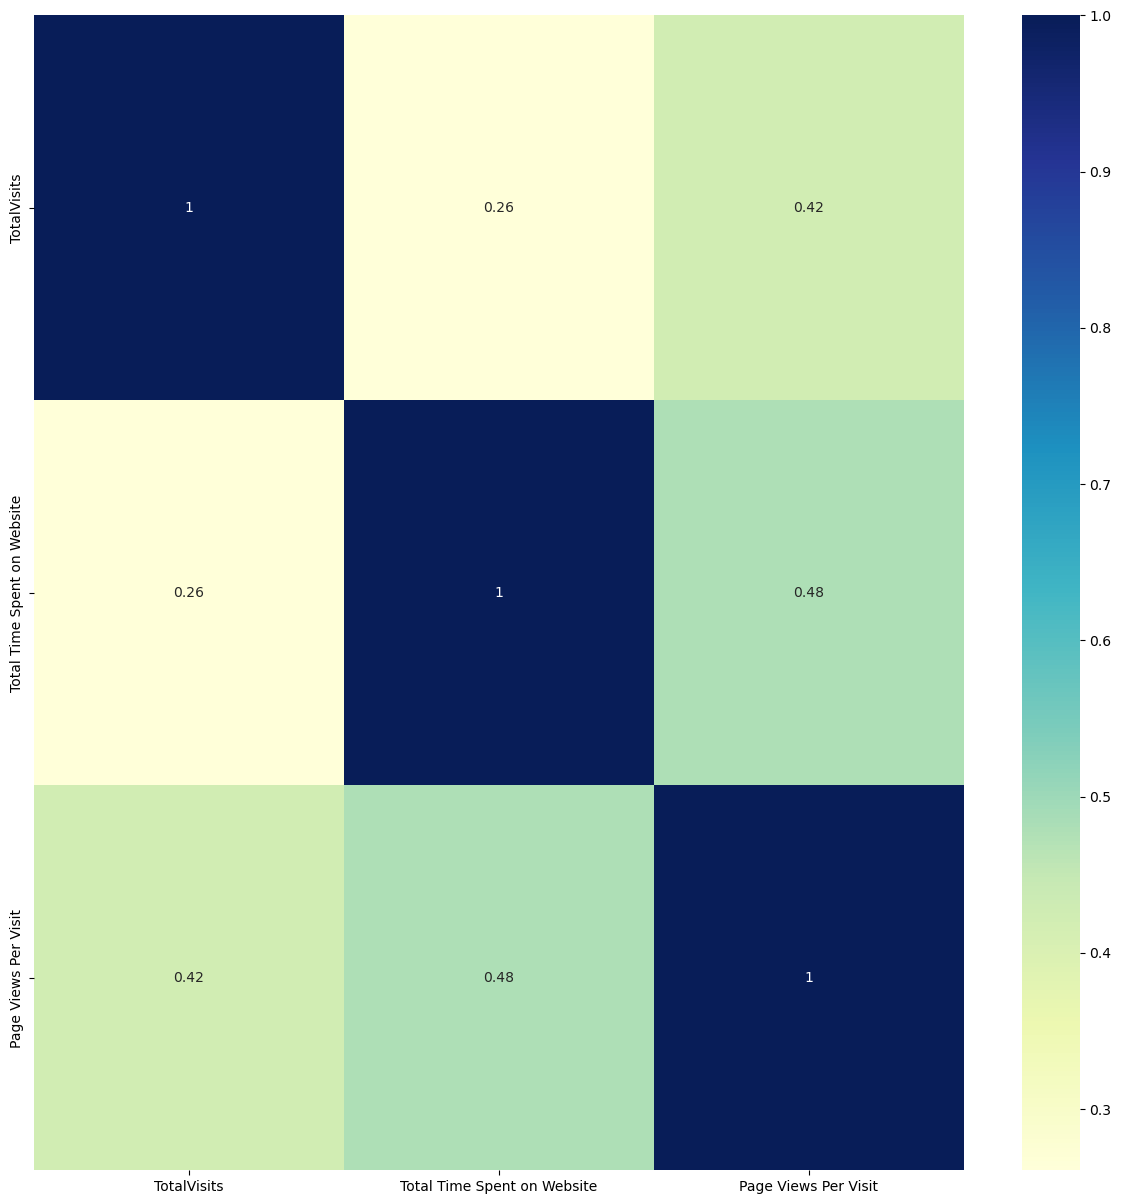

In [71]:
plt.figure(figsize = (15,15))
sns.heatmap(converted_leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr(), annot=True, cmap='YlGnBu')
plt.show()

In [72]:
new_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9074 non-null   int64  
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   How did you hear about X Education      9074 non-null   object 
 10  Lead Profile                            9074 non-null   obje

<function matplotlib.pyplot.show(close=None, block=None)>

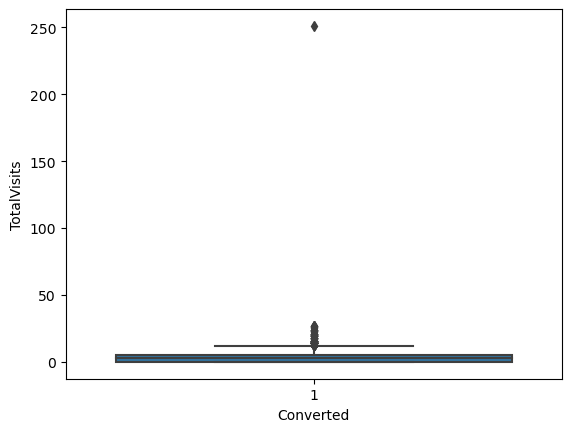

In [73]:
sns.boxplot(x = 'Converted', y = 'TotalVisits', data = converted_leads)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

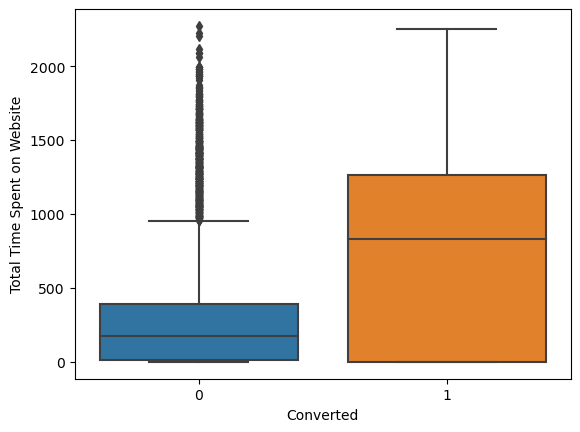

In [74]:
sns.boxplot(x = 'Converted', y = 'Total Time Spent on Website', data = new_leads)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

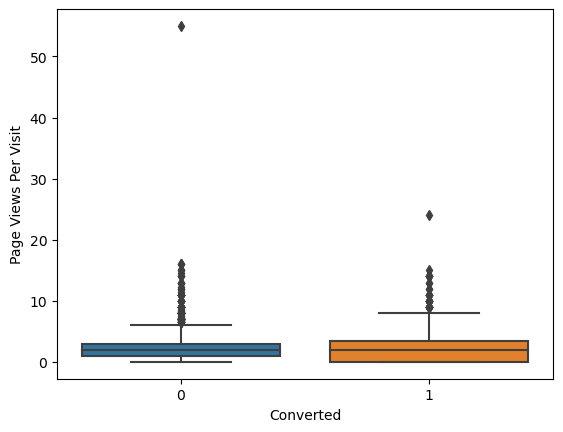

In [75]:
sns.boxplot(x = 'Converted', y = 'Page Views Per Visit', data = new_leads)
plt.show

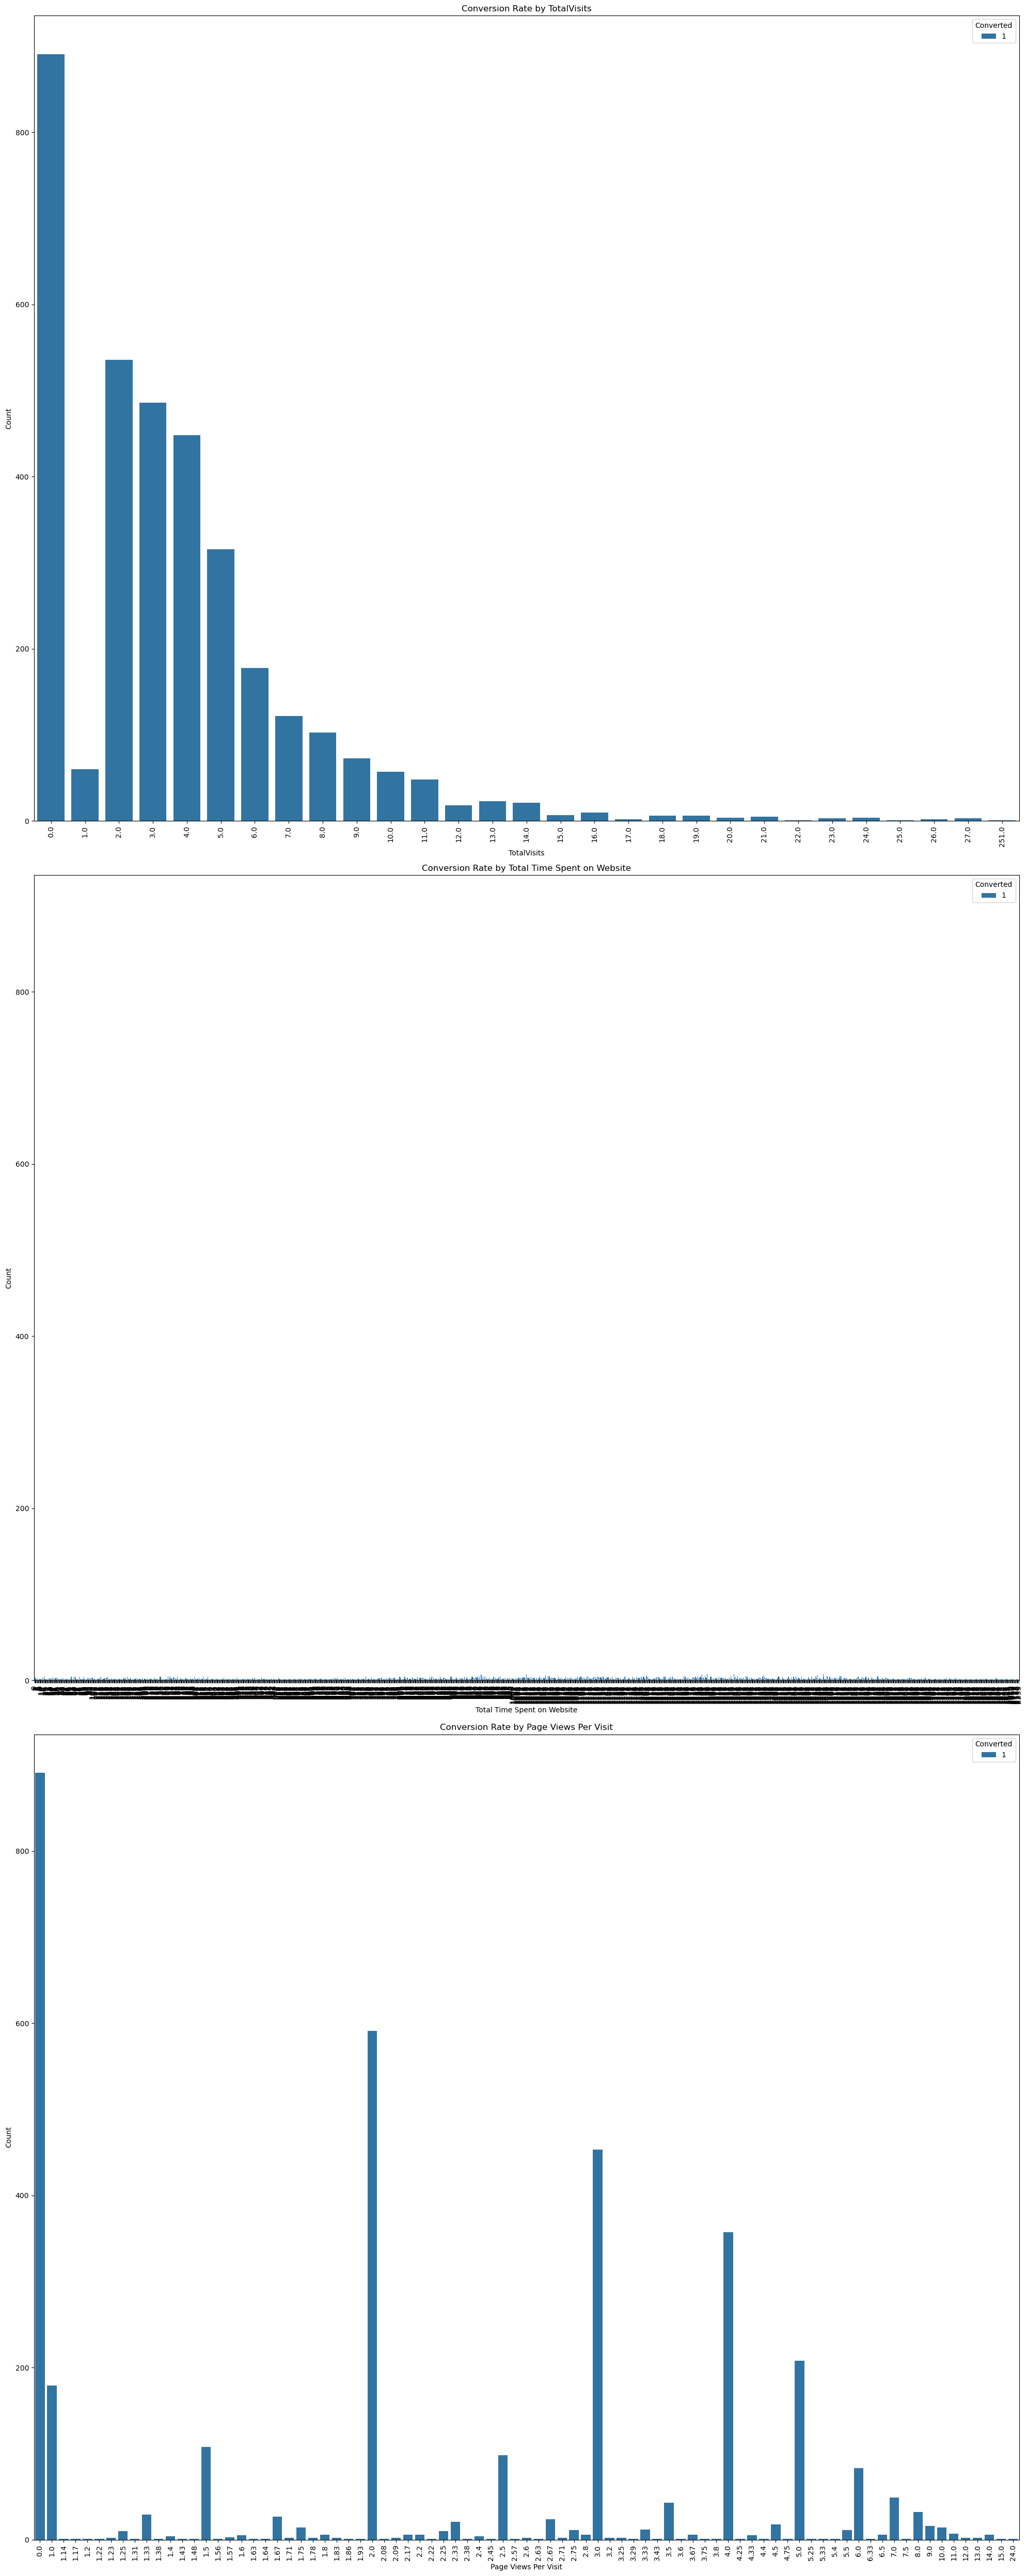

In [76]:
numerical_columns = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

# Set up the figure size and subplots
plt.figure(figsize=(20, 50))
for i, colm in enumerate(numerical_columns, start=1):
    plt.subplot(3, 1, i)
    sns.countplot(x=colm, hue='Converted', data=converted_leads)
    plt.xlabel(colm)
    plt.ylabel('Count')
    plt.title(f'Conversion Rate by {colm}')
    plt.xticks(rotation=90)  

plt.tight_layout()
plt.show()

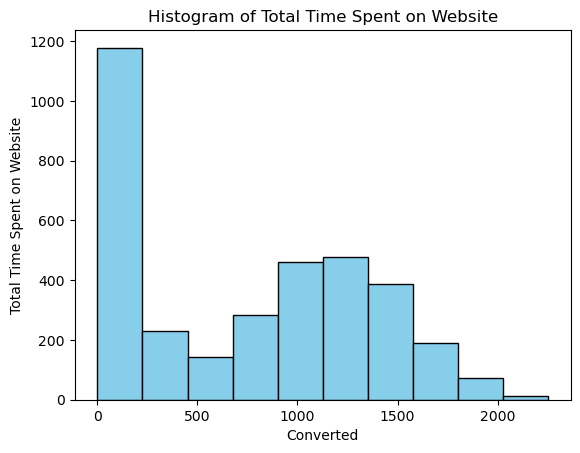

In [77]:
plt.hist(converted_leads['Total Time Spent on Website'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Converted')
plt.ylabel('Total Time Spent on Website')
plt.title('Histogram of Total Time Spent on Website')

plt.show()


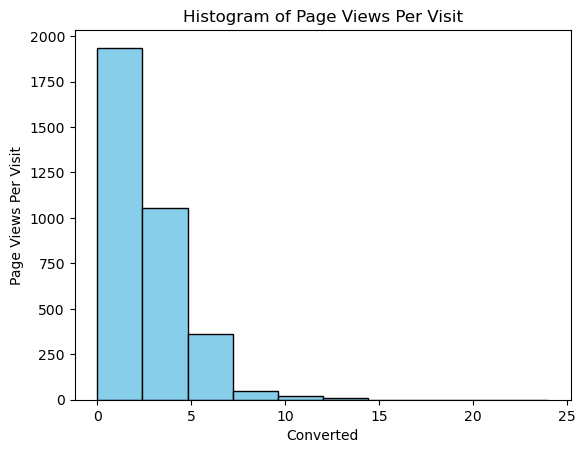

In [78]:
plt.hist(converted_leads['Page Views Per Visit'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Converted')
plt.ylabel('Page Views Per Visit')
plt.title('Histogram of Page Views Per Visit')

plt.show()


In [79]:
new_leads.select_dtypes(include=['object']).columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [80]:
new_leads['Lead Origin']

0                           API
1                           API
2       Landing Page Submission
3       Landing Page Submission
4       Landing Page Submission
                 ...           
9235    Landing Page Submission
9236    Landing Page Submission
9237    Landing Page Submission
9238    Landing Page Submission
9239    Landing Page Submission
Name: Lead Origin, Length: 9074, dtype: object

In [81]:
new_leads.head()

Lead Number              Lead Origin     Lead Source  Converted  \
0       660737                      API      Olark Chat          0   
1       660728                      API  Organic Search          0   
2       660727  Landing Page Submission  Direct Traffic          1   
3       660719  Landing Page Submission  Direct Traffic          0   
4       660681  Landing Page Submission          Google          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                  Unknown   
1             Email Opened                  Unknown   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                  Unknown   

  How did you hear about X Education    Lead Profile     City  \
0                            Unknown          Select  Unknown   
1                            Unknown          Select  Unknown   
2                            Unknown  Potential Lead   Mumbai   
3                      Word Of Mouth          Select   Mumbai   
4                              Other          Select   Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [82]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

Columnstodrop = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'Lead Profile', 'City',
       'Last Notable Activity']

# Creating dummy variables for all categorical variables, except the binary ones
lo = pd.get_dummies(new_leads['Lead Origin'], prefix='LeadOrigin')
ls = pd.get_dummies(new_leads['Lead Source'], prefix='LeadSource')
la = pd.get_dummies(new_leads['Last Activity'], prefix='Last Activity')
sp = pd.get_dummies(new_leads['Specialization'], prefix='Specialization')
ad = pd.get_dummies(new_leads['How did you hear about X Education'], prefix='GetToKnow')
lp = pd.get_dummies(new_leads['Lead Profile'], prefix='LeadProfile')
ct = pd.get_dummies(new_leads['City'], prefix='City')
lna = pd.get_dummies(new_leads['Last Notable Activity'], prefix='LastNotableActivity')

new_leads = pd.concat([new_leads, lo,ls,la,sp,ad,lp,ct,lna], axis=1)

new_leads = new_leads.drop(Columnstodrop, axis=1)

In [83]:
new_leads['A free copy of Mastering The Interview'] = new_leads['A free copy of Mastering The Interview'].replace({'Yes': 1, 'No': 0})

In [84]:
new_leads = new_leads.rename(columns={'A free copy of Mastering The Interview': 'Freebie'})

In [85]:
new_leads.head()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0       660737          0          0.0                            0   
1       660728          0          5.0                          674   
2       660727          1          2.0                         1532   
3       660719          0          1.0                          305   
4       660681          1          2.0                         1428   

   Page Views Per Visit  Freebie  LeadOrigin_API  \
0                   0.0        0               1   
1                   2.5        0               1   
2                   2.0        1               0   
3                   1.0        0               0   
4                   1.0        0               0   

   LeadOrigin_Landing Page Submission  LeadOrigin_Lead Add Form  \
0                                   0                         0   
1                                   0                         0   
2                                   1                         0   
3                                   1                         0   
4                                   1                         0   

   LeadOrigin_Lead Import  ...  LastNotableActivity_Form Submitted on Website  \
0                       0  ...                                              0   
1                       0  ...                                              0   
2                       0  ...                                              0   
3                       0  ...                                              0   
4                       0  ...                                              0   

   LastNotableActivity_Had a Phone Conversation  LastNotableActivity_Modified  \
0                                             0                             1   
1                                             0                             0   
2                                             0                             0   
3                                             0                             1   
4                                             0                             1   

   LastNotableActivity_Olark Chat Conversation  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   LastNotableActivity_Page Visited on Website  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   LastNotableActivity_Resubscribed to emails  LastNotableActivity_SMS Sent  \
0                                           0                             0   
1                                           0                             0   
2                                           0                             0   
3                                           0                             0   
4                                           0                             0   

   LastNotableActivity_Unreachable  LastNotableActivity_Unsubscribed  \
0                                0                                 0   
1                                0                                 0   
2                                0                                 0   
3                                0                                 0   
4                                0                                 0   

   LastNotableActivity_View in browser link Clicked  
0                                                 0  
1                                                 0  
2                                                 0  
3                                                 0  
4                                                 0  

[5 rows x 106 columns]

### Checking for Outliers

In [86]:
num_newleads = new_leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [87]:
num_newleads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9074.000000                  9074.000000           9074.000000
mean      3.456028                   482.887481              2.370151
std       4.858802                   545.256560              2.160871
min       0.000000                     0.000000              0.000000
25%       1.000000                    11.000000              1.000000
50%       3.000000                   246.000000              2.000000
75%       5.000000                   922.750000              3.200000
90%       7.000000                  1373.000000              5.000000
95%      10.000000                  1557.000000              6.000000
99%      17.000000                  1839.000000              9.000000
max     251.000000                  2272.000000             55.000000

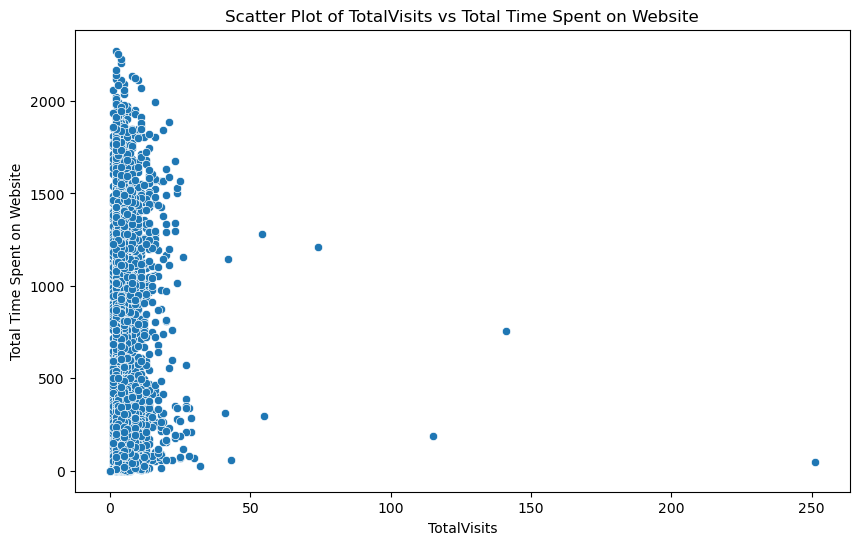

In [88]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalVisits', y='Total Time Spent on Website', data=num_newleads)
plt.title('Scatter Plot of TotalVisits vs Total Time Spent on Website')
plt.xlabel('TotalVisits')
plt.ylabel('Total Time Spent on Website')
plt.show()

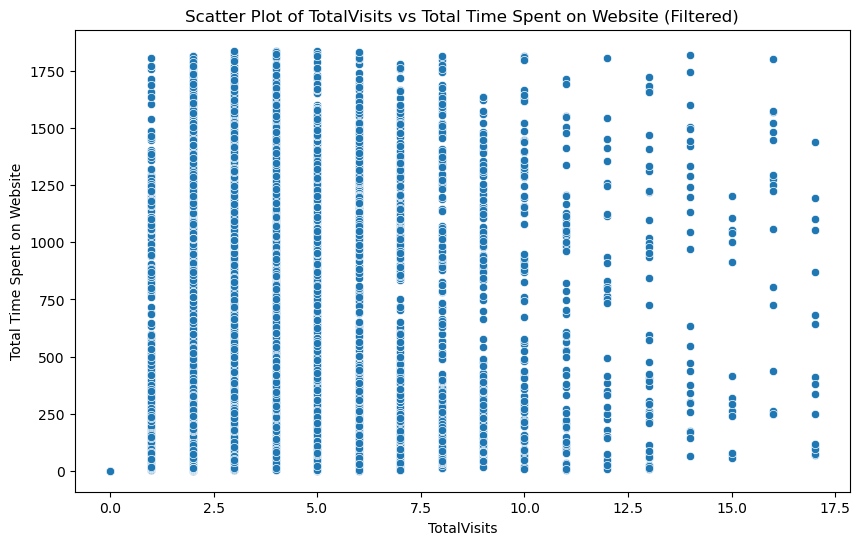

In [89]:
# Calculate the 99th percentile for each variable
percentile_99 = num_newleads.quantile(0.99)

# Filter the dataframe to remove outliers
num_newleads_filtered = num_newleads[(num_newleads['TotalVisits'] <= percentile_99['TotalVisits']) & 
                 (num_newleads['Total Time Spent on Website'] <= percentile_99['Total Time Spent on Website']) & 
                 (num_newleads['Page Views Per Visit'] <= percentile_99['Page Views Per Visit'])]

# Create the scatter plot with filtered data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalVisits', y='Total Time Spent on Website', data=num_newleads_filtered)
plt.title('Scatter Plot of TotalVisits vs Total Time Spent on Website (Filtered)')
plt.xlabel('TotalVisits')
plt.ylabel('Total Time Spent on Website')
plt.show()


In [90]:
# Calculate the 99th percentile for each variable
percentile_99 = num_newleads.quantile(0.99)

# Filter the dataframe to remove outliers
leads_filtered = num_newleads[(num_newleads['TotalVisits'] <= percentile_99['TotalVisits']) & 
                 (num_newleads['Total Time Spent on Website'] <= percentile_99['Total Time Spent on Website']) & 
                 (num_newleads['Page Views Per Visit'] <= percentile_99['Page Views Per Visit'])]


In [91]:
leads_filtered.describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  8836.000000                  8836.000000           8836.000000
mean      3.138298                   464.593821              2.264855
std       2.897787                   526.586843              1.893693
min       0.000000                     0.000000              0.000000
25%       1.000000                     5.000000              1.000000
50%       3.000000                   237.000000              2.000000
75%       5.000000                   885.000000              3.000000
max      17.000000                  1839.000000              9.000000

In [92]:
# Calculate the 99th percentile for each numerical variable
percentile_99 = new_leads.quantile(0.99)


leads_filtered = new_leads[(new_leads['TotalVisits'] <= percentile_99['TotalVisits']) & 
                               (new_leads['Total Time Spent on Website'] <= percentile_99['Total Time Spent on Website']) & 
                               (new_leads['Page Views Per Visit'] <= percentile_99['Page Views Per Visit'])]

In [93]:
leads_filtered.head()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0       660737          0          0.0                            0   
1       660728          0          5.0                          674   
2       660727          1          2.0                         1532   
3       660719          0          1.0                          305   
4       660681          1          2.0                         1428   

   Page Views Per Visit  Freebie  LeadOrigin_API  \
0                   0.0        0               1   
1                   2.5        0               1   
2                   2.0        1               0   
3                   1.0        0               0   
4                   1.0        0               0   

   LeadOrigin_Landing Page Submission  LeadOrigin_Lead Add Form  \
0                                   0                         0   
1                                   0                         0   
2                                   1                         0   
3                                   1                         0   
4                                   1                         0   

   LeadOrigin_Lead Import  ...  LastNotableActivity_Form Submitted on Website  \
0                       0  ...                                              0   
1                       0  ...                                              0   
2                       0  ...                                              0   
3                       0  ...                                              0   
4                       0  ...                                              0   

   LastNotableActivity_Had a Phone Conversation  LastNotableActivity_Modified  \
0                                             0                             1   
1                                             0                             0   
2                                             0                             0   
3                                             0                             1   
4                                             0                             1   

   LastNotableActivity_Olark Chat Conversation  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   LastNotableActivity_Page Visited on Website  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   LastNotableActivity_Resubscribed to emails  LastNotableActivity_SMS Sent  \
0                                           0                             0   
1                                           0                             0   
2                                           0                             0   
3                                           0                             0   
4                                           0                             0   

   LastNotableActivity_Unreachable  LastNotableActivity_Unsubscribed  \
0                                0                                 0   
1                                0                                 0   
2                                0                                 0   
3                                0                                 0   
4                                0                                 0   

   LastNotableActivity_View in browser link Clicked  
0                                                 0  
1                                                 0  
2                                                 0  
3                                                 0  
4                                                 0  

[5 rows x 106 columns]

In [94]:
leads_filtered.shape

(8836, 106)

### Split the data

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X = leads_filtered.drop(['Lead Number','Converted'], axis=1)

X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  Freebie  \
0          0.0                            0                   0.0        0   
1          5.0                          674                   2.5        0   
2          2.0                         1532                   2.0        1   
3          1.0                          305                   1.0        0   
4          2.0                         1428                   1.0        0   

   LeadOrigin_API  LeadOrigin_Landing Page Submission  \
0               1                                   0   
1               1                                   0   
2               0                                   1   
3               0                                   1   
4               0                                   1   

   LeadOrigin_Lead Add Form  LeadOrigin_Lead Import  LeadSource_Click2call  \
0                         0                       0                      0   
1                         0                       0                      0   
2                         0                       0                      0   
3                         0                       0                      0   
4                         0                       0                      0   

   LeadSource_Direct Traffic  ...  \
0                          0  ...   
1                          0  ...   
2                          1  ...   
3                          1  ...   
4                          0  ...   

   LastNotableActivity_Form Submitted on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   LastNotableActivity_Had a Phone Conversation  LastNotableActivity_Modified  \
0                                             0                             1   
1                                             0                             0   
2                                             0                             0   
3                                             0                             1   
4                                             0                             1   

   LastNotableActivity_Olark Chat Conversation  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   LastNotableActivity_Page Visited on Website  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   LastNotableActivity_Resubscribed to emails  LastNotableActivity_SMS Sent  \
0                                           0                             0   
1                                           0                             0   
2                                           0                             0   
3                                           0                             0   
4                                           0                             0   

   LastNotableActivity_Unreachable  LastNotableActivity_Unsubscribed  \
0                                0                                 0   
1                                0                                 0   
2                                0                                 0   
3                                0                                 0   
4                                0                                 0   

   LastNotableActivity_View in browser link Clicked  
0                                                 0  
1                                                 0  
2                          

In [97]:
y = leads_filtered['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [98]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  Freebie  \
5024    -0.406859                     1.168724             -0.160928        1   
5651     0.968987                    -0.323229              1.940239        0   
8875    -0.062897                    -0.875593             -0.423574        0   
53       0.968987                    -0.344109             -0.423574        0   
1928    -0.062897                     1.449651             -0.423574        0   

      LeadOrigin_API  LeadOrigin_Landing Page Submission  \
5024               0                                   1   
5651               0                                   1   
8875               1                                   0   
53                 1                                   0   
1928               1                                   0   

      LeadOrigin_Lead Add Form  LeadOrigin_Lead Import  LeadSource_Click2call  \
5024                         0                       0                      0   
5651                         0                       0                      0   
8875                         0                       0                      0   
53                           0                       0                      0   
1928                         0                       0                      0   

      LeadSource_Direct Traffic  ...  \
5024                          1  ...   
5651                          0  ...   
8875                          0  ...   
53                            0  ...   
1928                          0  ...   

      LastNotableActivity_Form Submitted on Website  \
5024                                              0   
5651                                              0   
8875                                              0   
53                                                0   
1928                                              0   

      LastNotableActivity_Had a Phone Conversation  \
5024                                             0   
5651                                             0   
8875                                             0   
53                                               0   
1928                                             0   

      LastNotableActivity_Modified  \
5024                             0   
5651                             0   
8875                             1   
53                               1   
1928                             1   

      LastNotableActivity_Olark Chat Conversation  \
5024                                            0   
5651                                            0   
8875                                            0   
53                                              0   
1928                                            0   

      LastNotableActivity_Page Visited on Website  \
5024                                            0   
5651                                            0   
8875                                            0   
53                                              0   
1928                                            0   

      LastNotableActivity_Resubscribed to emails  \
5024                                           0   
5651                                           0   
8875                                           0   
53                                             0   
1928                                           0   

      LastNotableActivity_SMS Sent  LastNotableActivity_Unreachable  \
5024                             1                                0   
5651                             1                                0   
8875                             0                                0   
53                               0                                0   
1928                             0                                0   

      LastNotableActivity_Unsubscribed  \
5024                                 0   
5651                                 0   
8875                                 0   

In [101]:
coversion = (sum(leads_filtered['Converted'])/len(leads_filtered['Converted'].index))*100
coversion

37.47170665459484

## Looking at Correlations

In [102]:
leads_filtered.shape

(8836, 106)

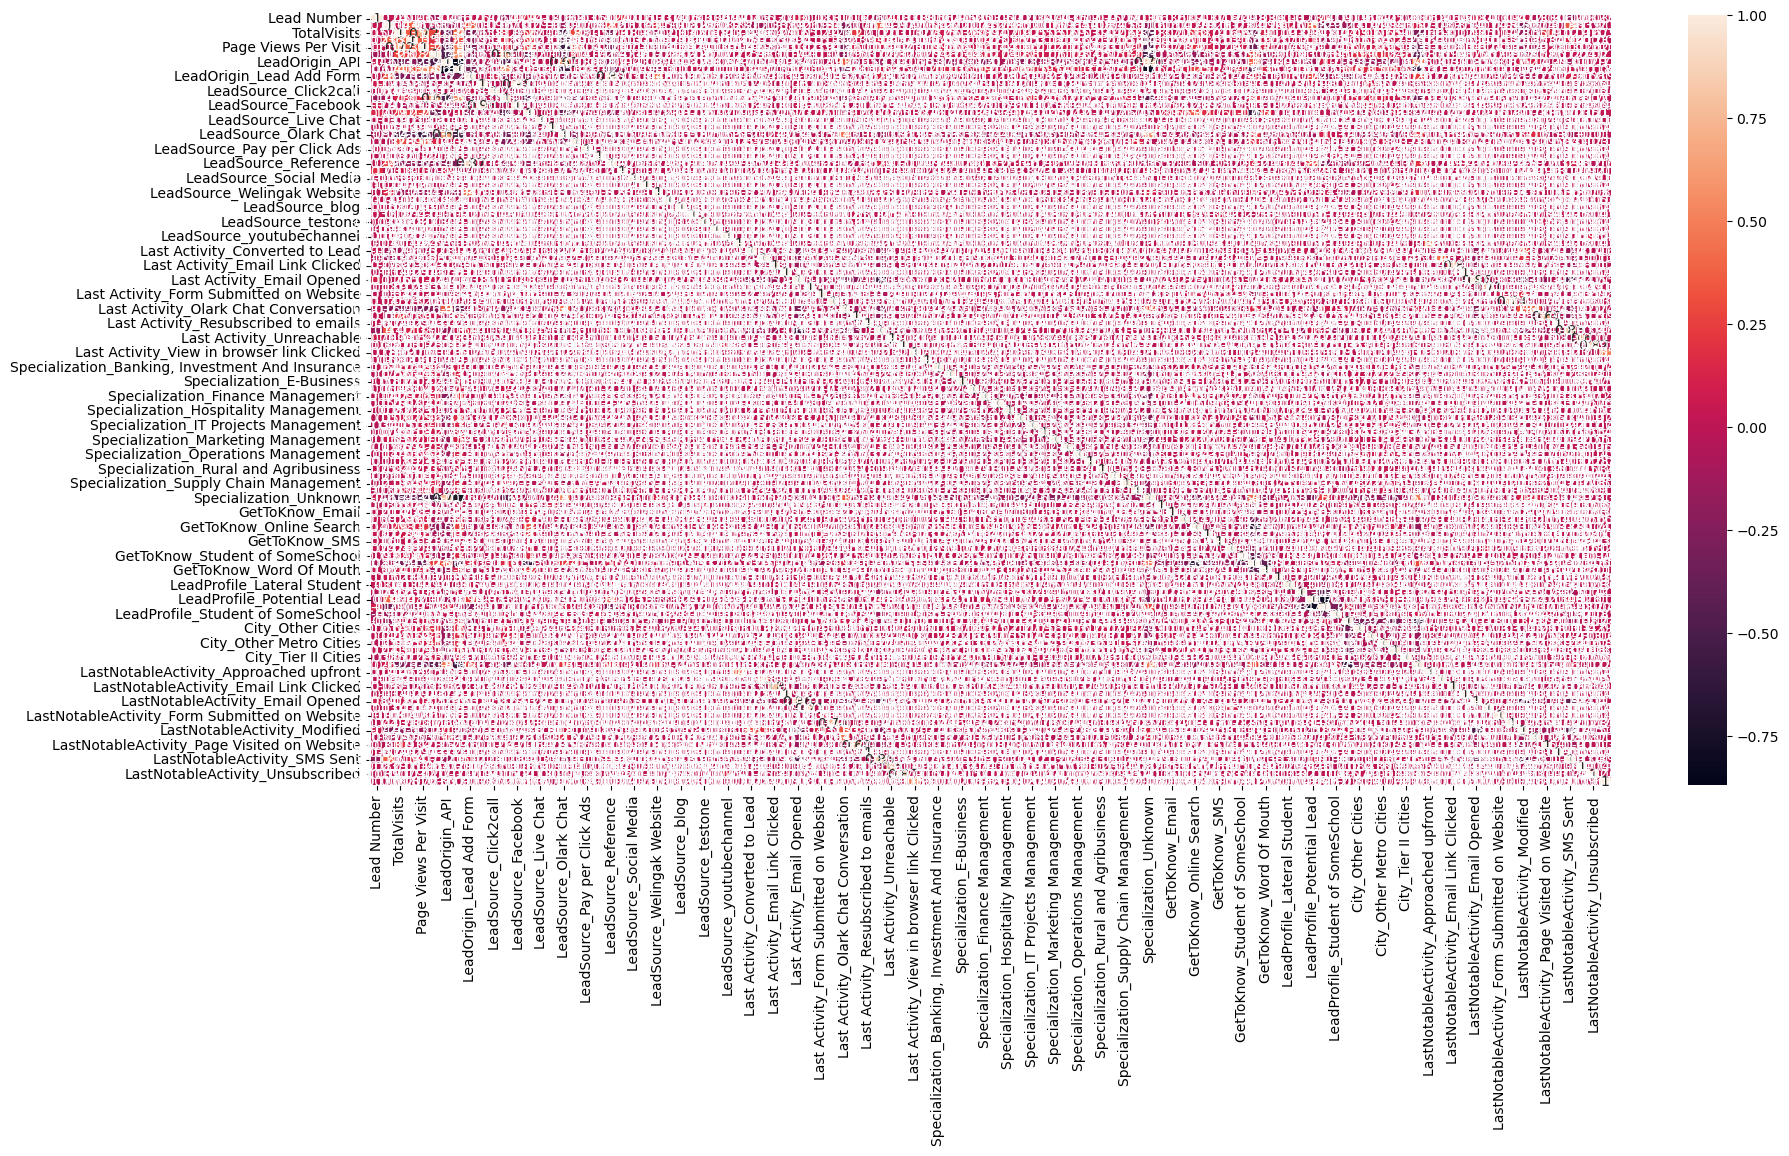

In [103]:
plt.figure(figsize = (20,10))       
sns.heatmap(leads_filtered.corr(),annot = True)
plt.show()

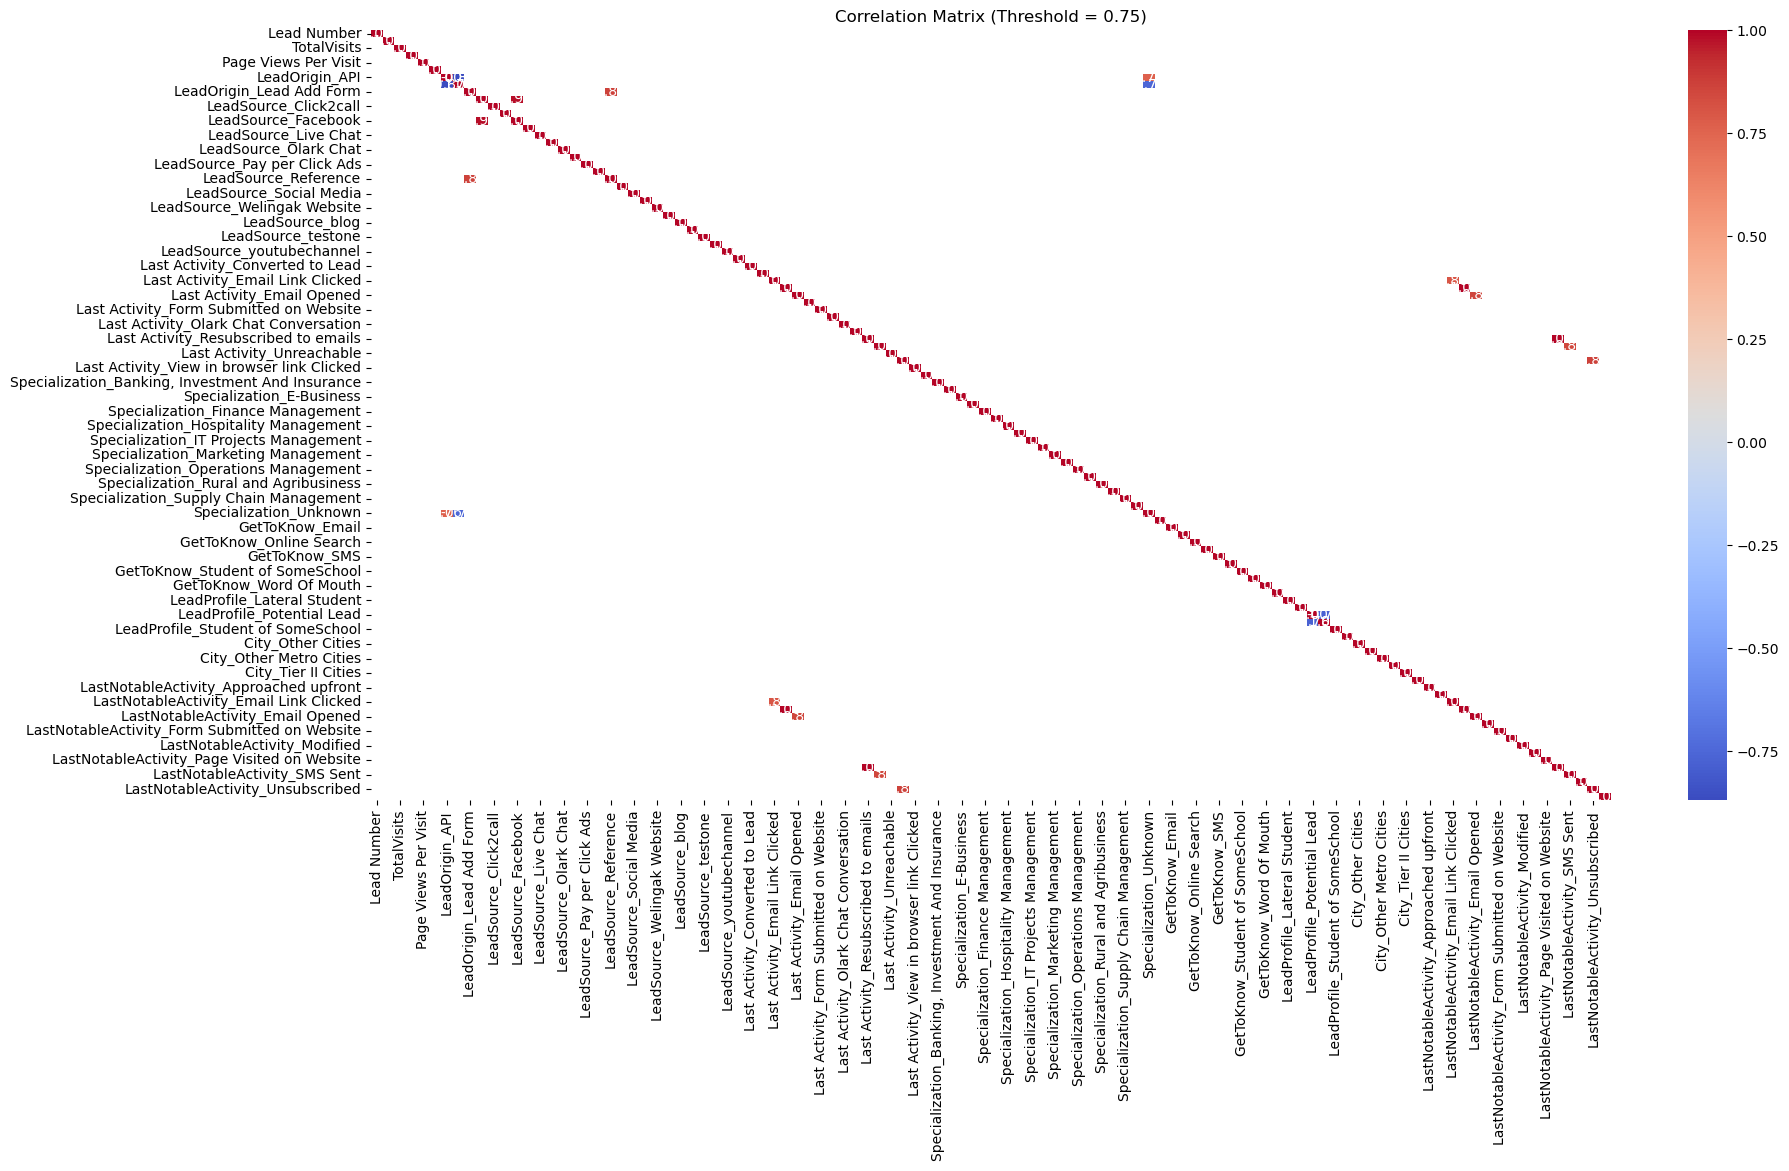

In [104]:
thres = 0.75

# Calculate correlation matrix
corr_matrix = leads_filtered.corr()

# Filter correlations above threshold
high_corr = np.abs(corr_matrix) > thres
corr_matrix_filtered = corr_matrix.mask(~high_corr)

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Matrix (Threshold = {thres})')
plt.show()

In [105]:
# Define the threshold
thres = 0.75

# Filter correlations above threshold
high_corr = np.abs(corr_matrix) > thres

# Iterate through the correlation matrix and print out highly correlated pairs
print("Highly correlated pairs:")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if high_corr.iloc[i, j]:
            print(f"{corr_matrix.columns[i]} - {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]}")


Highly correlated pairs:
LeadOrigin_API - LeadOrigin_Landing Page Submission: -0.8686122721431065
LeadOrigin_API - Specialization_Unknown: 0.7621252802225278
LeadOrigin_Landing Page Submission - Specialization_Unknown: -0.7570835369005813
LeadOrigin_Lead Add Form - LeadSource_Reference: 0.8657599621405165
LeadOrigin_Lead Import - LeadSource_Facebook: 0.9836828959264798
Last Activity_Email Link Clicked - LastNotableActivity_Email Link Clicked: 0.7972554406413814
Last Activity_Email Marked Spam - LastNotableActivity_Email Marked Spam: 1.0
Last Activity_Email Opened - LastNotableActivity_Email Opened: 0.8612014839952601
Last Activity_Resubscribed to emails - LastNotableActivity_Resubscribed to emails: 1.0
Last Activity_SMS Sent - LastNotableActivity_SMS Sent: 0.8534428214065477
Last Activity_Unsubscribed - LastNotableActivity_Unsubscribed: 0.8678622298443034
LeadProfile_Potential Lead - LeadProfile_Select: -0.7759537223710125


In [106]:
leads_filtered.corr()

Lead Number  Converted  \
Lead Number                                          1.000000   0.024394   
Converted                                            0.024394   1.000000   
TotalVisits                                          0.050654   0.044467   
Total Time Spent on Website                          0.022710   0.357132   
Page Views Per Visit                                 0.062517  -0.005122   
...                                                       ...        ...   
LastNotableActivity_Resubscribed to emails           0.006158   0.013743   
LastNotableActivity_SMS Sent                        -0.170037   0.363873   
LastNotableActivity_Unreachable                      0.008185   0.038957   
LastNotableActivity_Unsubscribed                     0.003882  -0.020538   
LastNotableActivity_View in browser link Clicked     0.001600  -0.008236   

                                                  TotalVisits  \
Lead Number                                          0.050654   
Converted                                            0.044467   
TotalVisits                                          1.000000   
Total Time Spent on Website                          0.351335   
Page Views Per Visit                                 0.721234   
...                                                       ...   
LastNotableActivity_Resubscribed to emails          -0.011523   
LastNotableActivity_SMS Sent                         0.019373   
LastNotableActivity_Unreachable                      0.015978   
LastNotableActivity_Unsubscribed                     0.007887   
LastNotableActivity_View in browser link Clicked     0.017850   

                                                  Total Time Spent on Website  \
Lead Number                                                          0.022710   
Converted                                                            0.357132   
TotalVisits                                                          0.351335   
Total Time Spent on Website                                          1.000000   
Page Views Per Visit                                                 0.350218   
...                                                                       ...   
LastNotableActivity_Resubscribed to emails                          -0.009387   
LastNotableActivity_SMS Sent                                         0.135123   
LastNotableActivity_Unreachable                                      0.012162   
LastNotableActivity_Unsubscribed                                     0.003217   
LastNotableActivity_View in browser link Clicked                    -0.007589   

                                                  Page Views Per Visit  \
Lead Number                                                   0.062517   
Converted                                                    -0.005122   
TotalVisits                                                   0.721234   
Total Time Spent on Website                                   0.350218   
Page Views Per Visit                                          1.000000   
...                                                                ...   
LastNotableActivity_Resubscribed to emails                   -0.012725   
LastNotableActivity_SMS Sent                                  0.069854   
LastNotableActivity_Unreachable                               0.025804   
LastNotableActivity_Unsubscribed                              0.019849   
LastNotableActivity_View in browser link Clicked              0.002276   

                                                   Freebie  LeadOrigin_API  \
Lead Number                                      -0.106992        0.046238   
Converted                                        -0.035105       -0.113015   
TotalVisits                                       0.279271       -0.301876   
Total Time Spent on Website                       0.179425       -0.202328   
Page Views Per Visit                              0.288896       -0.391321   
...                       

### Model Building
Let's start by splitting our data into a training set and a test set.

In [107]:
import statsmodels.api as sm

In [108]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6185
Model:                            GLM   Df Residuals:                     6092
Model Family:                Binomial   Df Model:                           92
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 21 Apr 2024   Deviance:                   1.2404e+05
Time:                        18:55:54   Pearson chi2:                 6.06e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                              2.01e+15   1.15e+07   1.74e+08      0.000    2.01e+15    2.01e+15
TotalVisits                                       2.778e+13   1.35e+06   2.06e+07      0.000    2.78e+13    2.78e+13
Total Time Spent on Website                      -2.005e+13   9.91e+05  -2.02e+07      0.000      -2e+13      -2e+13
Page Views Per Visit                              4.157e+13   1.46e+06   2.85e+07      0.000    4.16e+13    4.16e+13
Freebie                                           1.301e+14   3.36e+06   3.87e+07      0.000     1.3e+14     1.3e+14
LeadOrigin_API                                   -1.272e+15   2.33e+07  -5.46e+07      0.000   -1.27e+15   -1.27e+15
LeadOrigin_Landing Page Submission               -1.509e+15   2.32e+07  -6.51e+07      0.000   -1.51e+15   -1.51e+15
LeadOrigin_Lead Add Form                          1.083e+15   5.49e+07   1.97e+07      0.000    1.08e+15    1.08e+15
LeadOrigin_Lead Import                            3.708e+15   5.65e+07   6.56e+07      0.000    3.71e+15    3.71e+15
LeadSource_Click2call                             1.106e+15   7.26e+07   1.52e+07      0.000    1.11e+15    1.11e+15
LeadSource_Direct Traffic                         8.883e+14    1.8e+07   4.94e+07      0.000    8.88e+14    8.88e+14
LeadSource_Facebook                              -4.873e+15    6.6e+07  -7.39e+07      0.000   -4.87e+15   -4.87e+15
LeadSource_Google                                 8.634e+14   1.79e+07   4.83e+07      0.000    8.63e+14    8.63e+14
LeadSource_Live Chat                              1.532e+15   8.54e+07    1.8e+07      0.000    1.53e+15    1.53e+15
LeadSource_NC_EDM                                 2.948e+15   6.69e+07    4.4e+07      0.000    2.95e+15    2.95e+15
LeadSource_Olark Chat                             5.785e+14   1.81e+07   3.19e+07      0.000    5.79e+14    5.79e+14
LeadSource_Organic Search                         8.344e+14    1.8e+07   4.63e+07      0.000    8.34e+14    8.34e+14
LeadSource_Pay per Click Ads                      -4.83e+15   6.64e+07  -7.27e+07      0.000   -4.83e+15   -4.83e+15
LeadSource_Press_Release                         -1.743e+14   6.67e+07  -2.61e+06      0.000   -1.74e+14   -1.74e+14
LeadSource_Reference                             -5.962e+14   5.68e+07  -1.05e+07      0.000   -5.96e+14   -5.96e+14
LeadSource_Referral Sites                         6.542e+14   1.92e+07   3.41e+07      0.000    6.54e+14    6.54e+14
LeadSource_Social Media                          -1.655e+15   6.67e+07  -2.48e+07      0.000   -1.65e+15   -1.65e+15
LeadSource_WeLearn                                  6.2e+15   6.64e+07   9.33e+07      0.000     6.2e+15     6.2e+15
LeadSource_Welingak Website              

### Feature Selection Using RFE

In [109]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [110]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [111]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 36),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 37),
 ('Freebie', False, 42),
 ('LeadOrigin_API', True, 1),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 80),
 ('LeadSource_Click2call', False, 70),
 ('LeadSource_Direct Traffic', False, 17),
 ('LeadSource_Facebook', False, 24),
 ('LeadSource_Google', False, 19),
 ('LeadSource_Live Chat', False, 68),
 ('LeadSource_NC_EDM', False, 10),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 18),
 ('LeadSource_Pay per Click Ads', False, 54),
 ('LeadSource_Press_Release', False, 78),
 ('LeadSource_Reference', False, 76),
 ('LeadSource_Referral Sites', False, 61),
 ('LeadSource_Social Media', False, 69),
 ('LeadSource_WeLearn', False, 60),
 ('LeadSource_Welingak Website', True, 1),
 ('LeadSource_bing', False, 57),
 ('LeadSource_blog', False, 38),
 ('LeadSource_google', False, 29),
 ('LeadS

In [112]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'LeadOrigin_API',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Welingak Website',
       'Last Activity_Approached upfront', 'Last Activity_Email Bounced',
       'Last Activity_Email Received',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Unknown',
       'GetToKnow_Email', 'LeadProfile_Dual Specialization Student',
       'LeadProfile_Lateral Student', 'LeadProfile_Potential Lead',
       'LeadProfile_Student of SomeSchool',
       'LastNotableActivity_Email Bounced', 'LastNotableActivity_SMS Sent',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [113]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Freebie',
       'LeadOrigin_Lead Import', 'LeadSource_Click2call',
       'LeadSource_Direct Traffic', 'LeadSource_Facebook', 'LeadSource_Google',
       'LeadSource_Live Chat', 'LeadSource_NC_EDM',
       'LeadSource_Organic Search', 'LeadSource_Pay per Click Ads',
       'LeadSource_Press_Release', 'LeadSource_Reference',
       'LeadSource_Referral Sites', 'LeadSource_Social Media',
       'LeadSource_WeLearn', 'LeadSource_bing', 'LeadSource_blog',
       'LeadSource_google', 'LeadSource_testone',
       'LeadSource_welearnblog_Home', 'LeadSource_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubsc

### Assessing the model with StatsModels

In [114]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6185
Model:                            GLM   Df Residuals:                     6164
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2450.2
Date:                Sun, 21 Apr 2024   Deviance:                       4900.5
Time:                        18:56:01   Pearson chi2:                 6.24e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4125
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.1838      0.633     -0.290      0.772      -1.425       1.058
Total Time Spent on Website                 1.0951      0.041     26.609      0.000       1.014       1.176
LeadOrigin_API                             -0.7240      0.640     -1.132      0.258      -1.977       0.529
LeadOrigin_Landing Page Submission         -1.6033      0.636     -2.519      0.012      -2.851      -0.356
LeadOrigin_Lead Add Form                    2.8957      0.680      4.256      0.000       1.562       4.229
LeadSource_Olark Chat                       1.3102      0.127     10.283      0.000       1.060       1.560
LeadSource_Welingak Website                 2.9160      1.045      2.790      0.005       0.867       4.965
Last Activity_Approached upfront           23.9908   4.19e+04      0.001      1.000   -8.21e+04    8.22e+04
Last Activity_Email Bounced                -2.5056      0.533     -4.703      0.000      -3.550      -1.461
Last Activity_Email Received               24.2979   5.46e+04      0.000      1.000   -1.07e+05    1.07e+05
Last Activity_Had a Phone Conversation      2.2759      0.753      3.021      0.003       0.799       3.752
Last Activity_Olark Chat Conversation      -1.4250      0.173     -8.231      0.000      -1.764      -1.086
Specialization_Unknown                     -0.8572      0.134     -6.408      0.000      -1.119      -0.595
GetToKnow_Email                             2.1080      0.604      3.487      0.000       0.923       3.293
LeadProfile_Dual Specialization Student    23.7004   1.83e+04      0.001      0.999   -3.59e+04     3.6e+04
LeadProfile_Lateral Student                23.5677   1.61e+04      0.001      0.999   -3.15e+04    3.15e+04
LeadProfile_Potential Lead                  1.7820      0.103     17.358      0.000       1.581       1.983
LeadProfile_Student of SomeSchool          -1.9624      0.447     -4.388      0.000      -2.839      -1.086
LastNotableActivity_Email Bounced           1.8660      0.756      2.469      0.014       0.385       3.347
LastNotableActivity_SMS Sent                1.7456      0.082     21.255      0.000       1.585       1.907
LastNotableActivity_Unreachable             2.2389      0.573      3.911      0.000       1.117       3.361
===========================================================================================================
"""

In [115]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5024    0.775294
5651    0.402409
8875    0.015537
53      0.027470
1928    0.921418
8966    0.897547
7952    0.990557
3674    0.039406
1260    0.193700
6608    0.971324
dtype: float64

In [116]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.77529425, 0.40240929, 0.01553715, 0.02746975, 0.92141765,
       0.89754748, 0.99055662, 0.03940556, 0.19369992, 0.97132381])

### Creating a dataframe with the actual churn flag and the predicted probabilities

In [117]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

Converted  Convert_Prob  Lead Number
0          0      0.775294         5024
1          1      0.402409         5651
2          0      0.015537         8875
3          0      0.027470           53
4          1      0.921418         1928

### Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

In [118]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)


y_train_pred_final.head()

Converted  Convert_Prob  Lead Number  predicted
0          0      0.775294         5024          1
1          1      0.402409         5651          0
2          0      0.015537         8875          0
3          0      0.027470           53          0
4          1      0.921418         1928          1

In [119]:
from sklearn import metrics

In [120]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3418  441]
 [ 685 1641]]


In [122]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.817946645109135


### Checking VIFs

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                            LeadOrigin_API  5.65
11                   Specialization_Unknown  4.85
4                     LeadSource_Olark Chat  2.33
3                  LeadOrigin_Lead Add Form  1.79
15               LeadProfile_Potential Lead  1.50
2        LeadOrigin_Landing Page Submission  1.48
18             LastNotableActivity_SMS Sent  1.45
10    Last Activity_Olark Chat Conversation  1.44
5               LeadSource_Welingak Website  1.39
0               Total Time Spent on Website  1.32
7               Last Activity_Email Bounced  1.27
17        LastNotableActivity_Email Bounced  1.20
16        LeadProfile_Student of SomeSchool  1.05
14              LeadProfile_Lateral Student  1.03
9    Last Activity_Had a Phone Conversation  1.01
12                          GetToKnow_Email  1.01
13  LeadProfile_Dual Specialization Student  1.01
19          LastNotableActivity_Unreachable  1.01
8              Last Activity_Email Received  1.00
6          Last Activity_Approached upfront  1.00

In [125]:
col = col.drop('LeadOrigin_API', 1)
col

Index(['Total Time Spent on Website', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'Last Activity_Approached upfront',
       'Last Activity_Email Bounced', 'Last Activity_Email Received',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Unknown',
       'GetToKnow_Email', 'LeadProfile_Dual Specialization Student',
       'LeadProfile_Lateral Student', 'LeadProfile_Potential Lead',
       'LeadProfile_Student of SomeSchool',
       'LastNotableActivity_Email Bounced', 'LastNotableActivity_SMS Sent',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [126]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6185
Model:                            GLM   Df Residuals:                     6165
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2450.8
Date:                Sun, 21 Apr 2024   Deviance:                       4901.6
Time:                        19:05:01   Pearson chi2:                 6.23e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4124
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8875      0.135     -6.587      0.000      -1.152      -0.623
Total Time Spent on Website                 1.0916      0.041     26.627      0.000       1.011       1.172
LeadOrigin_Landing Page Submission         -0.8969      0.136     -6.612      0.000      -1.163      -0.631
LeadOrigin_Lead Add Form                    3.6037      0.273     13.184      0.000       3.068       4.139
LeadSource_Olark Chat                       1.2974      0.127     10.233      0.000       1.049       1.546
LeadSource_Welingak Website                 2.9201      1.045      2.794      0.005       0.871       4.969
Last Activity_Approached upfront           23.9927   4.19e+04      0.001      1.000   -8.22e+04    8.22e+04
Last Activity_Email Bounced                -2.5056      0.533     -4.704      0.000      -3.550      -1.462
Last Activity_Email Received               24.2983   5.46e+04      0.000      1.000   -1.07e+05    1.07e+05
Last Activity_Had a Phone Conversation      2.2715      0.753      3.016      0.003       0.795       3.748
Last Activity_Olark Chat Conversation      -1.4273      0.173     -8.246      0.000      -1.767      -1.088
Specialization_Unknown                     -0.8681      0.134     -6.496      0.000      -1.130      -0.606
GetToKnow_Email                             2.1061      0.605      3.484      0.000       0.921       3.291
LeadProfile_Dual Specialization Student    23.6971   1.83e+04      0.001      0.999   -3.59e+04    3.59e+04
LeadProfile_Lateral Student                23.5631   1.61e+04      0.001      0.999   -3.15e+04    3.15e+04
LeadProfile_Potential Lead                  1.7809      0.103     17.349      0.000       1.580       1.982
LeadProfile_Student of SomeSchool          -1.9631      0.447     -4.391      0.000      -2.839      -1.087
LastNotableActivity_Email Bounced           1.8651      0.756      2.468      0.014       0.384       3.346
LastNotableActivity_SMS Sent                1.7434      0.082     21.243      0.000       1.583       1.904
LastNotableActivity_Unreachable             2.2338      0.572      3.902      0.000       1.112       3.356
===========================================================================================================
"""

In [127]:
col = col.drop('Last Activity_Approached upfront', 1)
col

Index(['Total Time Spent on Website', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Received',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Unknown',
       'GetToKnow_Email', 'LeadProfile_Dual Specialization Student',
       'LeadProfile_Lateral Student', 'LeadProfile_Potential Lead',
       'LeadProfile_Student of SomeSchool',
       'LastNotableActivity_Email Bounced', 'LastNotableActivity_SMS Sent',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [128]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6185
Model:                            GLM   Df Residuals:                     6166
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2453.5
Date:                Sun, 21 Apr 2024   Deviance:                       4907.0
Time:                        19:18:14   Pearson chi2:                 6.24e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4119
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8885      0.135     -6.593      0.000      -1.153      -0.624
Total Time Spent on Website                 1.0933      0.041     26.683      0.000       1.013       1.174
LeadOrigin_Landing Page Submission         -0.8934      0.136     -6.588      0.000      -1.159      -0.628
LeadOrigin_Lead Add Form                    3.6059      0.273     13.194      0.000       3.070       4.142
LeadSource_Olark Chat                       1.3053      0.127     10.301      0.000       1.057       1.554
LeadSource_Welingak Website                 2.9191      1.045      2.793      0.005       0.870       4.968
Last Activity_Email Bounced                -2.5094      0.533     -4.711      0.000      -3.553      -1.465
Last Activity_Email Received               24.2943   5.46e+04      0.000      1.000   -1.07e+05    1.07e+05
Last Activity_Had a Phone Conversation      2.2694      0.753      3.013      0.003       0.793       3.746
Last Activity_Olark Chat Conversation      -1.4328      0.173     -8.280      0.000      -1.772      -1.094
Specialization_Unknown                     -0.8658      0.134     -6.480      0.000      -1.128      -0.604
GetToKnow_Email                             2.1041      0.605      3.481      0.001       0.919       3.289
LeadProfile_Dual Specialization Student    23.6939   1.83e+04      0.001      0.999   -3.59e+04     3.6e+04
LeadProfile_Lateral Student                23.5610   1.61e+04      0.001      0.999   -3.15e+04    3.15e+04
LeadProfile_Potential Lead                  1.7790      0.103     17.331      0.000       1.578       1.980
LeadProfile_Student of SomeSchool          -1.9675      0.447     -4.400      0.000      -2.844      -1.091
LastNotableActivity_Email Bounced           1.8646      0.756      2.468      0.014       0.384       3.346
LastNotableActivity_SMS Sent                1.7403      0.082     21.210      0.000       1.579       1.901
LastNotableActivity_Unreachable             2.2315      0.572      3.898      0.000       1.109       3.354
===========================================================================================================
"""

In [129]:
col = col.drop('Last Activity_Email Received', 1)
col

Index(['Total Time Spent on Website', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Unknown',
       'GetToKnow_Email', 'LeadProfile_Dual Specialization Student',
       'LeadProfile_Lateral Student', 'LeadProfile_Potential Lead',
       'LeadProfile_Student of SomeSchool',
       'LastNotableActivity_Email Bounced', 'LastNotableActivity_SMS Sent',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [130]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6185
Model:                            GLM   Df Residuals:                     6167
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2455.7
Date:                Sun, 21 Apr 2024   Deviance:                       4911.4
Time:                        19:18:49   Pearson chi2:                 6.24e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4115
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8873      0.135     -6.585      0.000      -1.151      -0.623
Total Time Spent on Website                 1.0941      0.041     26.708      0.000       1.014       1.174
LeadOrigin_Landing Page Submission         -0.8907      0.136     -6.569      0.000      -1.156      -0.625
LeadOrigin_Lead Add Form                    3.6068      0.273     13.198      0.000       3.071       4.142
LeadSource_Olark Chat                       1.3063      0.127     10.310      0.000       1.058       1.555
LeadSource_Welingak Website                 2.9187      1.045      2.792      0.005       0.870       4.967
Last Activity_Email Bounced                -2.5125      0.533     -4.717      0.000      -3.557      -1.468
Last Activity_Had a Phone Conversation      2.2663      0.753      3.009      0.003       0.790       3.743
Last Activity_Olark Chat Conversation      -1.4339      0.173     -8.287      0.000      -1.773      -1.095
Specialization_Unknown                     -0.8663      0.134     -6.484      0.000      -1.128      -0.604
GetToKnow_Email                             2.1007      0.604      3.475      0.001       0.916       3.286
LeadProfile_Dual Specialization Student    23.6910   1.83e+04      0.001      0.999   -3.59e+04     3.6e+04
LeadProfile_Lateral Student                23.5580   1.61e+04      0.001      0.999   -3.15e+04    3.15e+04
LeadProfile_Potential Lead                  1.7764      0.103     17.309      0.000       1.575       1.978
LeadProfile_Student of SomeSchool          -1.9707      0.447     -4.407      0.000      -2.847      -1.094
LastNotableActivity_Email Bounced           1.8647      0.756      2.468      0.014       0.384       3.346
LastNotableActivity_SMS Sent                1.7375      0.082     21.184      0.000       1.577       1.898
LastNotableActivity_Unreachable             2.2290      0.572      3.894      0.000       1.107       3.351
===========================================================================================================
"""

In [131]:
col = col.drop('LeadProfile_Dual Specialization Student', 1)
col

Index(['Total Time Spent on Website', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Unknown',
       'GetToKnow_Email', 'LeadProfile_Lateral Student',
       'LeadProfile_Potential Lead', 'LeadProfile_Student of SomeSchool',
       'LastNotableActivity_Email Bounced', 'LastNotableActivity_SMS Sent',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [132]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6185
Model:                            GLM   Df Residuals:                     6168
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2466.4
Date:                Sun, 21 Apr 2024   Deviance:                       4932.7
Time:                        19:19:21   Pearson chi2:                 6.26e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4094
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.8554      0.134     -6.401      0.000      -1.117      -0.594
Total Time Spent on Website                1.0978      0.041     26.829      0.000       1.018       1.178
LeadOrigin_Landing Page Submission        -0.9104      0.135     -6.762      0.000      -1.174      -0.647
LeadOrigin_Lead Add Form                   3.5976      0.273     13.169      0.000       3.062       4.133
LeadSource_Olark Chat                      1.3101      0.126     10.358      0.000       1.062       1.558
LeadSource_Welingak Website                2.9263      1.045      2.799      0.005       0.878       4.975
Last Activity_Email Bounced               -2.5220      0.533     -4.735      0.000      -3.566      -1.478
Last Activity_Had a Phone Conversation     2.2557      0.753      2.994      0.003       0.779       3.732
Last Activity_Olark Chat Conversation     -1.4435      0.173     -8.341      0.000      -1.783      -1.104
Specialization_Unknown                    -0.8918      0.133     -6.712      0.000      -1.152      -0.631
GetToKnow_Email                            2.0946      0.605      3.463      0.001       0.909       3.280
LeadProfile_Lateral Student               23.5441   1.61e+04      0.001      0.999   -3.15e+04    3.15e+04
LeadProfile_Potential Lead                 1.7623      0.103     17.181      0.000       1.561       1.963
LeadProfile_Student of SomeSchool         -1.9848      0.447     -4.437      0.000      -2.862      -1.108
LastNotableActivity_Email Bounced          1.8624      0.756      2.464      0.014       0.381       3.344
LastNotableActivity_SMS Sent               1.7330      0.082     21.167      0.000       1.573       1.893
LastNotableActivity_Unreachable            2.2178      0.572      3.875      0.000       1.096       3.340
==========================================================================================================
"""

In [133]:
col = col.drop('LeadProfile_Lateral Student', 1)
col

Index(['Total Time Spent on Website', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Unknown',
       'GetToKnow_Email', 'LeadProfile_Potential Lead',
       'LeadProfile_Student of SomeSchool',
       'LastNotableActivity_Email Bounced', 'LastNotableActivity_SMS Sent',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [134]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6185
Model:                            GLM   Df Residuals:                     6169
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2475.8
Date:                Sun, 21 Apr 2024   Deviance:                       4951.6
Time:                        19:19:49   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4076
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.8346      0.133     -6.270      0.000      -1.096      -0.574
Total Time Spent on Website                1.0979      0.041     26.890      0.000       1.018       1.178
LeadOrigin_Landing Page Submission        -0.9183      0.134     -6.841      0.000      -1.181      -0.655
LeadOrigin_Lead Add Form                   3.6357      0.272     13.358      0.000       3.102       4.169
LeadSource_Olark Chat                      1.3044      0.126     10.333      0.000       1.057       1.552
LeadSource_Welingak Website                2.8994      1.045      2.776      0.006       0.852       4.947
Last Activity_Email Bounced               -2.5301      0.533     -4.751      0.000      -3.574      -1.486
Last Activity_Had a Phone Conversation     2.2533      0.751      3.002      0.003       0.782       3.724
Last Activity_Olark Chat Conversation     -1.4489      0.173     -8.373      0.000      -1.788      -1.110
Specialization_Unknown                    -0.9033      0.132     -6.820      0.000      -1.163      -0.644
GetToKnow_Email                            2.0851      0.605      3.447      0.001       0.900       3.271
LeadProfile_Potential Lead                 1.7504      0.102     17.084      0.000       1.550       1.951
LeadProfile_Student of SomeSchool         -1.9976      0.448     -4.462      0.000      -2.875      -1.120
LastNotableActivity_Email Bounced          1.8610      0.756      2.462      0.014       0.380       3.342
LastNotableActivity_SMS Sent               1.7226      0.082     21.066      0.000       1.562       1.883
LastNotableActivity_Unreachable            2.2071      0.572      3.858      0.000       1.086       3.328
==========================================================================================================
"""

In [135]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5024    0.777782
5651    0.404851
8875    0.015548
53      0.027529
1928    0.924658
8966    0.895744
7952    0.990426
3674    0.038902
1260    0.196650
6608    0.972817
dtype: float64

In [136]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.77778169, 0.40485131, 0.01554836, 0.02752925, 0.92465822,
       0.89574421, 0.99042568, 0.03890229, 0.19664993, 0.97281661])

In [137]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

Converted  Convert_Prob  Lead Number
0          0      0.777782         5024
1          1      0.404851         5651
2          0      0.015548         8875
3          0      0.027529           53
4          1      0.924658         1928

In [138]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)


y_train_pred_final.head()

Converted  Convert_Prob  Lead Number  predicted
0          0      0.777782         5024          1
1          1      0.404851         5651          0
2          0      0.015548         8875          0
3          0      0.027529           53          0
4          1      0.924658         1928          1

In [139]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3407  452]
 [ 691 1635]]


In [140]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8151980598221503


In [141]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                    LeadSource_Olark Chat  2.04
8                   Specialization_Unknown  1.93
2                 LeadOrigin_Lead Add Form  1.64
7    Last Activity_Olark Chat Conversation  1.44
13            LastNotableActivity_SMS Sent  1.42
1       LeadOrigin_Landing Page Submission  1.39
4              LeadSource_Welingak Website  1.36
10              LeadProfile_Potential Lead  1.33
0              Total Time Spent on Website  1.30
5              Last Activity_Email Bounced  1.27
12       LastNotableActivity_Email Bounced  1.20
11       LeadProfile_Student of SomeSchool  1.04
9                          GetToKnow_Email  1.01
14         LastNotableActivity_Unreachable  1.01
6   Last Activity_Had a Phone Conversation  1.00

In [142]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [143]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7029234737747205

In [144]:
# Let us calculate specificity
TN / float(TN+FP)

0.882871210158072

In [145]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11712878984192795


In [146]:
# positive predictive value 
print (TP / float(TP+FP))

0.7834211787254433


In [147]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8313811615422158


In [148]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [150]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.predicted, drop_intermediate = False )

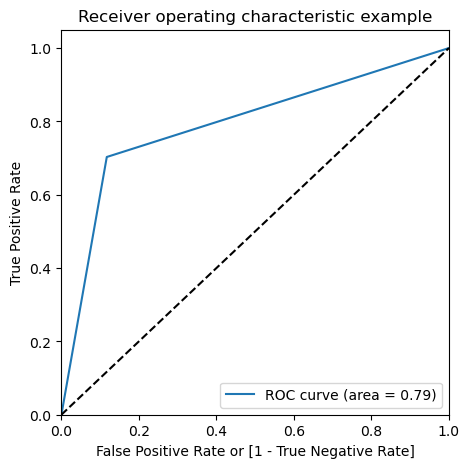

In [152]:
draw_roc( y_train_pred_final.Converted, y_train_pred_final.predicted)

In [153]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Convert_Prob  Lead Number  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0      0.777782         5024          1    0    0    0    0    0   
1          1      0.404851         5651          0    1    1    1    1    1   
2          0      0.015548         8875          0    0    0    0    0    0   
3          0      0.027529           53          0    0    0    0    0    0   
4          1      0.924658         1928          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    1    1    1    1    1  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    1    1    1    1    1

In [160]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensi  speci
0.0   0.0       1.0    1.0    1.0
0.1   0.1       1.0    1.0    1.0
0.2   0.2       1.0    1.0    1.0
0.3   0.3       1.0    1.0    1.0
0.4   0.4       1.0    1.0    1.0
0.5   0.5       1.0    1.0    1.0
0.6   0.6       1.0    1.0    1.0
0.7   0.7       1.0    1.0    1.0
0.8   0.8       1.0    1.0    1.0
0.9   0.9       1.0    1.0    1.0


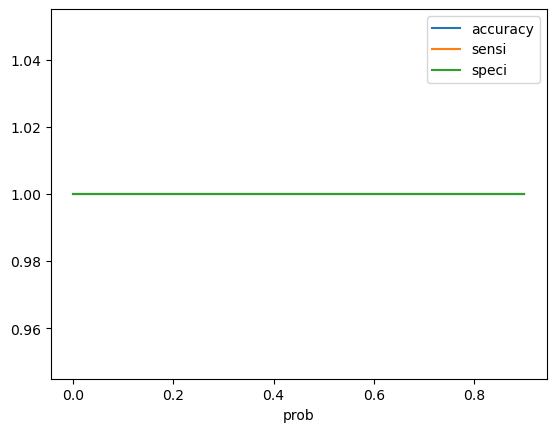

In [161]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [163]:
y_train_pred_final['final_predicted'] = y_train_pred_final.predicted.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Convert_Prob  Lead Number  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0      0.777782         5024          1    0    0    0    0    0   
1          1      0.404851         5651          0    1    1    1    1    1   
2          0      0.015548         8875          0    0    0    0    0    0   
3          0      0.027529           53          0    0    0    0    0    0   
4          1      0.924658         1928          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                1  
1    1    1    1    1    1                0  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    1    1    1    1    1                1

In [165]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8151980598221503

In [166]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
confusion2

array([[3407,  452],
       [ 691, 1635]], dtype=int64)